In [1]:
# Tyler Palmer
# ID: 801058786
# Homework 1
# https://github.com/TPal49

!pip install d2l==1.0.0-beta0
import torch

  
print(f"Is CUDA supported by this system? {torch.cuda.is_available()}")
print(f"CUDA version: {torch.version.cuda}")
  
# Storing ID of current CUDA device
cuda_id = torch.cuda.current_device() 
print(f"ID of current CUDA device:{torch.cuda.current_device()}")
        
print(f"Name of current CUDA device:{torch.cuda.get_device_name(cuda_id)}")




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.6/141.6 KB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 48.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.6/155.6 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.1 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616822 sha256=e2245bde154b4e4b1a0178cd1a577d76e1f59ff6c38a8c85b43b8be1dffce365
  Stored in directory: /root/.cache/pip/wheels/27/6d/b3/a3a6e10704795c9b9000f1ab2dc480dfe7bed42f5972806e73
Successfully built gym
  Attempting uninstal

Problem 1

In [41]:
import time
import torch # reimporting for redundancy
import torchvision
from torch import nn
from torch.nn import functional as F
from torchvision import transforms
from d2l import torch as d2l
from matplotlib import pyplot as plt
d2l.use_svg_display()


class FashionMNIST(d2l.DataModule): 
  def __init__(self, batch_size=64, resize=(28, 28)):
    super().__init__()
    self.save_hyperparameters()
    trans = transforms.Compose([transforms.Resize(resize),transforms.ToTensor()])
    self.train = torchvision.datasets.FashionMNIST(root=self.root, train=True, transform=trans, download=True)
    self.val = torchvision.datasets.FashionMNIST(root=self.root, train=False, transform=trans, download=True)


data = FashionMNIST(resize=(32, 32))
print(len(data.train), len(data.val))

@d2l.add_to_class(d2l.Module)
def training_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        #a = self.accuracy(self(*batch[:-1],batch[-1]))
        self.plot('loss', l, train=True)
        #self.plot('acc', a, train=True)
        return l


@d2l.add_to_class(FashionMNIST)  
def text_labels(self, indices):
    """Return text labels."""
    labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
              'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [labels[int(i)] for i in indices]

@d2l.add_to_class(FashionMNIST)  
def get_dataloader(self, train):
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,num_workers=self.num_workers)

@d2l.add_to_class(FashionMNIST)  
def visualize(self, batch, nrows=1, ncols=8, labels=[]):
    X, y = batch
    if not labels:
        labels = self.text_labels(y)
    d2l.show_images(X.squeeze(1), nrows, ncols, titles=labels)

class MLP(d2l.Classifier): # Model
  def __init__(self,num_output_classes,num_hidden_nodes,lr):
    super().__init__()
    self.save_hyperparameters()
    # Comment or Uncomment the desired nnet, either with or without dropout
    #self.net = nn.Sequential(nn.Flatten(),nn.LazyLinear(num_hidden_nodes),nn.ReLU(),
     #                        nn.LazyLinear(num_hidden_nodes),nn.ReLU(),
      #                       nn.LazyLinear(num_hidden_nodes),nn.ReLU(),
       #                      nn.LazyLinear(num_output_classes))
    
    self.net = nn.Sequential(nn.Flatten(),nn.LazyLinear(num_hidden_nodes),nn.ReLU(),nn.Dropout(0.3),
                             nn.LazyLinear(num_hidden_nodes),nn.ReLU(),nn.Dropout(0.3),
                             nn.LazyLinear(num_hidden_nodes),nn.ReLU(),nn.Dropout(0.3),
                             nn.LazyLinear(num_output_classes))


@d2l.add_to_class(d2l.Classifier)  
def loss(self, Y_hat, Y, averaged=True): # loss function, cross entropy for classification
    Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
    Y = Y.reshape((-1,))
    return F.cross_entropy(Y_hat, Y, reduction='mean' if averaged else 'none')

@d2l.add_to_class(d2l.Classifier)
def configure_optimizers(self):
  # Comment / Uncomment for model with manual weight decar or not
  return torch.optim.SGD(self.parameters(),lr = self.lr)
  #return torch.optim.SGD(self.parameters(),lr = self.lr,weight_decay= 0.001) 

60000 10000


Train Random Model

'358.25 sec has elapsed'

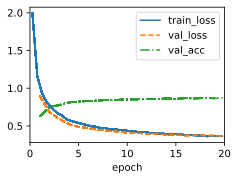

In [42]:

data = d2l.FashionMNIST(batch_size=32)
model = MLP(num_output_classes=10, num_hidden_nodes = 128, lr=0.01)
start = time.time()
trainer = d2l.Trainer(max_epochs=20)
trainer.fit(model, data)
f'{time.time() - start:.2f} sec has elapsed'

Train Presaved Model

'351.20 sec has elapsed'

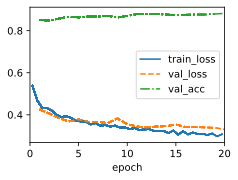

In [43]:
torch.save(model.state_dict(),'model.params')

test_clone = MLP(num_output_classes=10, num_hidden_nodes = 128, lr=0.1)
test_clone.load_state_dict(torch.load('model.params'))
test_clone.eval()
start = time.time()
trainer = d2l.Trainer(max_epochs=20)
trainer.fit(test_clone, data)
f'{time.time() - start:.2f} sec has elapsed'

Problem 2

average validation log mse = 0.0940524885058403


'20.76 sec has elapsed'

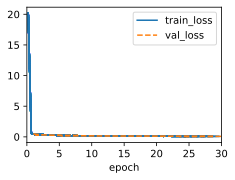

In [28]:
import pandas as pd

class LinearRegression(d2l.Module):  
    def __init__(self, lr):
        super().__init__()
        self.save_hyperparameters()

@d2l.add_to_class(LinearRegression)  
def forward(self, X):
    #self.net = nn.Sequential(nn.Flatten(),nn.LazyLinear(256),nn.ReLU(),
     #                        nn.LazyLinear(128),nn.ReLU,
      #                       nn.LazyLinear(64),nn.ReLU,
       #                      nn.LazyLinear(32),nn.Sigmoid(),
        #                     nn.LazyLinear(1))
    self.net = nn.Sequential(nn.Flatten(),nn.LazyLinear(256),nn.ReLU(),nn.Dropout(0.55),
                             nn.LazyLinear(128),nn.ReLU(),nn.Dropout(0.45),
                             nn.LazyLinear(64),nn.ReLU(),nn.Dropout(0.35),
                             nn.LazyLinear(32),nn.Sigmoid(),nn.Dropout(0.25),
                             nn.LazyLinear(1))
    return self.net(X)

@d2l.add_to_class(LinearRegression)
def loss(self,y_hat,y):
  fn = nn.MSELoss()
  return(fn,y_hat,y)

@d2l.add_to_class(LinearRegression)  
def configure_optimizers(self):
    #return torch.optim.SGD(self.parameters(), self.lr ) 
    return torch.optim.SGD(self.parameters(), self.lr, weight_decay= 0.001 ) 



class KaggleHouse(d2l.DataModule):
    def __init__(self, batch_size, train=None, val=None):
        super().__init__()
        self.save_hyperparameters()
        if self.train is None:
            self.raw_train = pd.read_csv(d2l.download(
                d2l.DATA_URL + 'kaggle_house_pred_train.csv', self.root,
                sha1_hash='585e9cc93e70b39160e7921475f9bcd7d31219ce'))
            self.raw_val = pd.read_csv(d2l.download(
                d2l.DATA_URL + 'kaggle_house_pred_test.csv', self.root,
                sha1_hash='fa19780a7b011d9b009e8bff8e99922a8ee2eb90'))
            
data = KaggleHouse(batch_size=64)
print(data.raw_train.shape)
print(data.raw_val.shape)


@d2l.add_to_class(KaggleHouse)
def preprocess(self):
    # Remove the ID and label columns
    label = 'SalePrice'
    features = pd.concat(
        (self.raw_train.drop(columns=['Id', label]),
         self.raw_val.drop(columns=['Id'])))
    # Standardize numerical columns
    numeric_features = features.dtypes[features.dtypes != 'object'].index
    features[numeric_features] = features[numeric_features].apply(
        lambda x: (x - x.mean()) / (x.std()))
    # Replace NAN numerical features by 0
    features[numeric_features] = features[numeric_features].fillna(0)
    # Replace discrete features by one-hot encoding.
    features = pd.get_dummies(features, dummy_na=True)
    # Save preprocessed features
    self.train = features[:self.raw_train.shape[0]].copy()
    self.train[label] = self.raw_train[label]
    self.val = features[self.raw_train.shape[0]:].copy()

@d2l.add_to_class(KaggleHouse)
def get_dataloader(self, train):
    label = 'SalePrice'
    data = self.train if train else self.val
    if label not in data: return
    get_tensor = lambda x: torch.tensor(x.values, dtype=torch.float32)
    # Logarithm of prices
    tensors = (get_tensor(data.drop(columns=[label])),  # X
               torch.log(get_tensor(data[label])).reshape((-1, 1)))  # Y
    return self.get_tensorloader(tensors, train)

def k_fold_data(data, k):
    rets = []
    fold_size = data.train.shape[0] // k
    for j in range(k):
        idx = range(j * fold_size, (j+1) * fold_size)
        rets.append(KaggleHouse(data.batch_size, data.train.drop(index=idx),
                                data.train.loc[idx]))
    return rets

def k_fold(trainer, data, k, lr):
    val_loss, models = [], []
    for i, data_fold in enumerate(k_fold_data(data, k)):
        model = d2l.LinearRegression(lr)
        model.board.yscale='log'
        if i != 0: model.board.display = False
        trainer.fit(model, data_fold)
        val_loss.append(float(model.board.data['val_loss'][-1].y))
        models.append(model)
    print(f'average validation log mse = {sum(val_loss)/len(val_loss)}')
    return models




data.preprocess()
data.train.shape
start = time.time()
trainer = d2l.Trainer(max_epochs=30)
models = k_fold(trainer, data, k=5, lr=0.01)
f'{time.time() - start:.2f} sec has elapsed'

In [11]:
preds = [model(torch.tensor(data.val.values, dtype=torch.float32))
         for model in models]
# Taking exponentiation of predictions in the logarithm scale
ensemble_preds = torch.exp(torch.cat(preds, 1)).mean(1)
submission = pd.DataFrame({'Id':data.raw_val.Id,
                           'SalePrice':ensemble_preds.detach().numpy()})
print(submission)
#submission.to_csv('submission.csv', index=False)

from google.colab import drive
drive.mount('drive')
submission.to_csv('submission.csv',index = False)
!cp submission.csv "drive/My Drive/"

        Id      SalePrice
0     1461   85453.078125
1     1462  635186.125000
2     1463  172723.453125
3     1464  185357.484375
4     1465  203120.484375
...    ...            ...
1454  2915   82963.796875
1455  2916   82962.632812
1456  2917  176205.625000
1457  2918  101855.359375
1458  2919  199173.578125

[1459 rows x 2 columns]
Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).
